In [1]:
import torch
import numpy as np
from ANN_model import Taipei_features12_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 32
RANDOM_STATE = 42

X = np.load('Grouped_by_city/taipei_features12_train.npy')
y = np.load('Grouped_by_city/taipei_target_train.npy')
X = np.delete(X, np.argmin(y, axis=0), axis=0)
y = np.delete(y, np.argmin(y, axis=0), axis=0)

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 2381


In [3]:
model = Taipei_features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=500, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=30, threshold=0.001)

[Epoch 1/500] train_loss: 0.125438, test_loss: 0.022833 | train_mape: 49.7039, test_mape: 24.4443
[Epoch 2/500] train_loss: 0.023330, test_loss: 0.016721 | train_mape: 22.5287, test_mape: 18.8141
[Epoch 3/500] train_loss: 0.020578, test_loss: 0.014261 | train_mape: 21.4925, test_mape: 17.2878
[Epoch 4/500] train_loss: 0.020438, test_loss: 0.015519 | train_mape: 20.9152, test_mape: 16.4597
[Epoch 5/500] train_loss: 0.018390, test_loss: 0.014802 | train_mape: 19.9351, test_mape: 15.7841
[Epoch 6/500] train_loss: 0.017508, test_loss: 0.014354 | train_mape: 19.4198, test_mape: 18.9971
[Epoch 7/500] train_loss: 0.016833, test_loss: 0.012822 | train_mape: 19.0727, test_mape: 16.1110
[Epoch 8/500] train_loss: 0.015831, test_loss: 0.012600 | train_mape: 18.3793, test_mape: 17.2480
[Epoch 9/500] train_loss: 0.014760, test_loss: 0.013341 | train_mape: 17.8433, test_mape: 19.2727
[Epoch 10/500] train_loss: 0.014332, test_loss: 0.010871 | train_mape: 17.6700, test_mape: 15.7763
[Epoch 11/500] trai

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/taipei_features12_model3.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

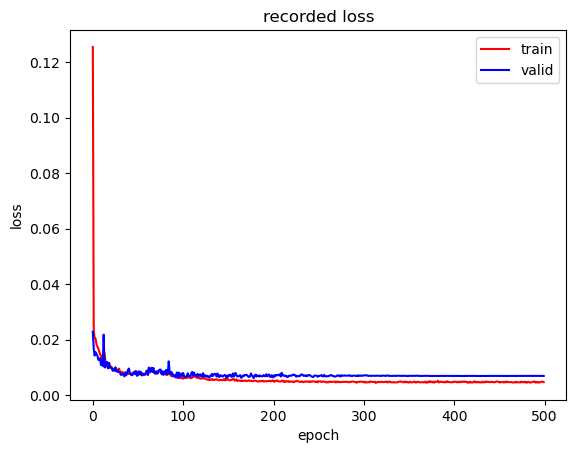

In [5]:
loss_plot(trainloss, testloss)

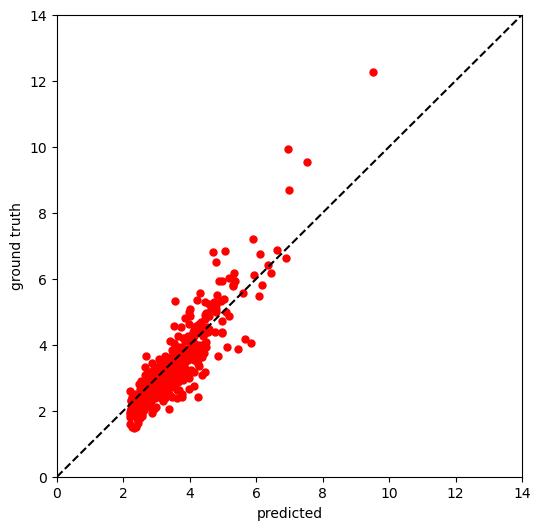

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

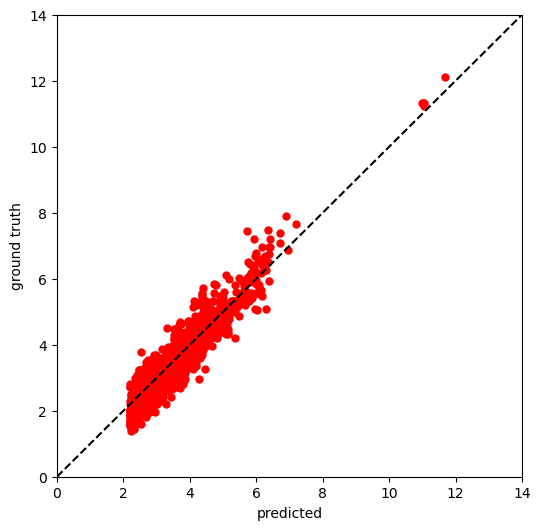

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)